In [43]:
from tqdm import tqdm

from src.logic.spell_checker.feature_filler import fill_features

model_from_file = 'freq_1000000_elgkbr_ru.txt'

with open(f'../data/processed/word_freqs/{model_from_file}') as f:
    correct_words = f.read().split('\n')

with open('../data/processed/spell_checker/synthetic_spelling_errors.txt') as f:
    spelling_errors = f.read().split('\n')

In [44]:
import pandas as pd

from src.logic.spell_checker.manager.tokenization import TokenizerManager
from src.logic.spell_checker.manager.ngram import NGramAnalyzer
from src.logic.spell_checker.manager.word_trie import WordTrie

df = pd.read_csv(f'../data/processed/word_freqs/{model_from_file}'.replace('txt', 'csv'), sep=',')
trie_words = df[df['freq'] > 1]['word'].values.tolist()
print(len(trie_words))

word_trie = WordTrie(words=trie_words)
word_trie.make()
ngram_analyzer = NGramAnalyzer(word_trie.get_words(), ngrams=(2, 3, 4))
tokenizer_manager = TokenizerManager(
    tokenizer_paths={
        'unigram_5k': '../data/processed/tokenizer/words_unigram_5000.tokenizer.json',
        'bpe_5k': '../data/processed/tokenizer/bpe_5000.tokenizer.json',
    }
)

95635


In [45]:
correct_words_data = []
pgbar = tqdm(correct_words, desc='correct_words')
for word in pgbar:
    correct_words_data.append(
        fill_features(
            word,
            word_trie=word_trie,
            tokenizer_manager=tokenizer_manager,
            ngram_analyzer=ngram_analyzer,
        )
    )

spelling_errors_data = []
pgbar = tqdm(spelling_errors, desc='spelling_errors')
for word in pgbar:
    spelling_errors_data.append(
        fill_features(
            word,
            word_trie=word_trie,
            tokenizer_manager=tokenizer_manager,
            ngram_analyzer=ngram_analyzer,
        )
    )

spelling_errors: 100%|██████████| 480270/480270 [02:27<00:00, 3254.24it/s]


In [46]:
import pandas as pd

df_correct = pd.DataFrame(correct_words_data)
df_correct['target'] = 1

df_errors = pd.DataFrame(spelling_errors_data)
df_errors['target'] = 0

df = pd.concat([df_correct, df_errors])

In [47]:
df.head(n=100)

,word,word_len,unigram_5k_char_count/token_count,unigram_5k_tokens,unigram_5k_tokens_count,unigram_5k_token_ids,unigram_5k_prefix,unigram_5k_prefix_len,unigram_5k_prefix_id,unigram_5k_suffix,...,4gram_treshold_m_50,4gram_treshold_100,4gram_treshold_m_100,longest_prefix,longest_prefix_len,longest_prefix/word_len,longest_suffix,longest_suffix_len,longest_suffix/word_len,target
0,",",1,1.000000,"[,]",1,[4991],",",1,4991,",",...,0.00,0.000000,0.000000,",",1,1.0,",",1,1.000000,1
1,.,1,1.000000,[.],1,[161],.,1,161,.,...,0.00,0.000000,0.000000,.,1,1.0,.,1,1.000000,1
2,и,1,1.000000,[и],1,[10],и,1,10,и,...,0.00,0.000000,0.000000,и,1,1.0,и,1,1.000000,1
3,я,1,1.000000,[я],1,[24],я,1,24,я,...,0.00,0.000000,0.000000,я,1,1.0,я,1,1.000000,1
4,»,1,1.000000,[»],1,[4990],»,1,4990,»,...,0.00,0.000000,0.000000,»,1,1.0,»,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Iуэхур,6,2.000000,"[Iуэ, ху, р]",3,"[274, 39, 11]",Iуэ,3,274,р,...,0.00,0.333333,0.333333,Iуэхур,6,1.0,ур,2,0.333333,1
96,къыхигъэщащ,11,2.200000,"[къ, ы, хигъэ, щ, ащ]",5,"[158, 166, 759, 9, 44]",къ,2,158,ащ,...,0.00,0.375000,0.375000,къыхигъэщащ,11,1.0,эщащ,4,0.363636,1
97,Къэбэрдей-Балъкъэр,18,3.000000,"[Къэбэрдей, -, Ба, лъ, къ, эр]",6,"[3704, 20, 539, 124, 158, 482]",Къэбэрдей,9,3704,эр,...,0.40,0.866667,0.866667,Къэбэрдей-Балъкъэр,18,1.0,эр,2,0.111111,1
98,къуажэм,7,2.333333,"[къу, а, жэм]",3,"[108, 30, 2171]",къу,3,108,жэм,...,0.25,0.500000,0.500000,къуажэм,7,1.0,ажэм,4,0.571429,1


In [48]:
print(df.columns)

Index(['word', 'word_len', 'unigram_5k_char_count/token_count',
       'unigram_5k_tokens', 'unigram_5k_tokens_count', 'unigram_5k_token_ids',
       'unigram_5k_prefix', 'unigram_5k_prefix_len', 'unigram_5k_prefix_id',
       'unigram_5k_suffix', 'unigram_5k_suffix_len', 'unigram_5k_suffix_id',
       'bpe_5k_char_count/token_count', 'bpe_5k_tokens', 'bpe_5k_tokens_count',
       'bpe_5k_token_ids', 'bpe_5k_prefix', 'bpe_5k_prefix_len',
       'bpe_5k_prefix_id', 'bpe_5k_suffix', 'bpe_5k_suffix_len',
       'bpe_5k_suffix_id', '2gram_treshold_10', '2gram_treshold_m_10',
       '2gram_treshold_100', '2gram_treshold_m_100', '2gram_treshold_200',
       '2gram_treshold_m_200', '2gram_treshold_500', '2gram_treshold_m_500',
       '2gram_treshold_1000', '2gram_treshold_m_1000', '3gram_treshold_10',
       '3gram_treshold_m_10', '3gram_treshold_50', '3gram_treshold_m_50',
       '3gram_treshold_100', '3gram_treshold_m_100', '3gram_treshold_200',
       '3gram_treshold_m_200', '3gram_treshol

In [49]:
features_columns = [
    # 'word', 
    'word_len', 
    'unigram_5k_char_count/token_count',
    # 'unigram_5k_tokens', 
    'unigram_5k_tokens_count', 
    # 'unigram_5k_token_ids',
    # 'unigram_5k_prefix', 
    'unigram_5k_prefix_len', 
    # 'unigram_5k_prefix_id',
    # 'unigram_5k_suffix', 
    'unigram_5k_suffix_len', 
    # 'unigram_5k_suffix_id',
    'bpe_5k_char_count/token_count', 
    # 'bpe_5k_tokens', 
    'bpe_5k_tokens_count',
    # 'bpe_5k_token_ids', 
    # 'bpe_5k_prefix', 
    'bpe_5k_prefix_len',
    # 'bpe_5k_prefix_id', 
    # 'bpe_5k_suffix', 
    'bpe_5k_suffix_len',
    # 'bpe_5k_suffix_id', 

    '2gram_treshold_10', 
    '2gram_treshold_m_10',
    '2gram_treshold_100',
    '2gram_treshold_m_100',
    '2gram_treshold_200',
    '2gram_treshold_m_200',
    '2gram_treshold_500',
    '2gram_treshold_m_500',
    '2gram_treshold_1000',
    '2gram_treshold_m_1000',

    '3gram_treshold_10',
    '3gram_treshold_m_10',
    '3gram_treshold_50',
    '3gram_treshold_m_50',
    '3gram_treshold_100',
    '3gram_treshold_m_100',
    '3gram_treshold_200',
    '3gram_treshold_m_200',
    '3gram_treshold_500',
    '3gram_treshold_m_500',
    
    '4gram_treshold_10',
    '4gram_treshold_m_10',
    '4gram_treshold_20',
    '4gram_treshold_m_20',
    '4gram_treshold_30',
    '4gram_treshold_m_30',
    '4gram_treshold_50',
    '4gram_treshold_m_50',
    '4gram_treshold_100',
    '4gram_treshold_m_100',

    # 'longest_prefix', 
    'longest_prefix_len',
    'longest_prefix/word_len', 
    # 'longest_suffix', 
    'longest_suffix_len',
    'longest_suffix/word_len', 
    # 'target',
]

df.dropna(inplace=True)
x = df[features_columns]

y = df['target']

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=16, min_samples_split=2)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, random_state=42)

In [61]:
import gzip
import pickle
import os

def save_model(model, filepath, append_gz_ext=True):
    if append_gz_ext and not filepath.endswith('.gz'):
        filepath += '.gz'

    with gzip.open(filepath, 'wb') as f:
        pickle.dump(model, f)

model_dir = '../data/processed/spell_checker/models'
os.makedirs(model_dir, exist_ok=True)
model_file_name = f'rf_classifier_model_{model_from_file}.pkl'

save_model(rf_classifier, filepath=os.path.join(model_dir, model_file_name))

In [53]:
from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9174536422776918


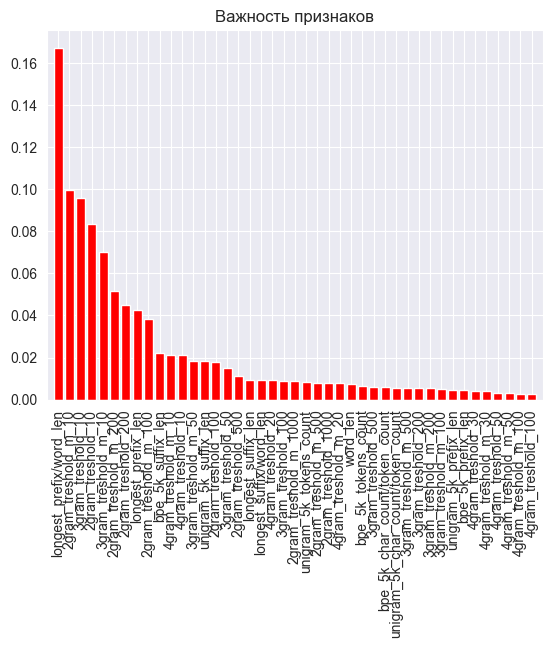

In [54]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Важность признаков")
plt.bar(
    x=range(x_train.shape[1]),
    height=importances[indices],
    color="r",
    align="center"
)
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])

feature_importance_dir = '../data/processed/spell_checker/feature_importances'
os.makedirs(feature_importance_dir, exist_ok=True)
file_name = f'rt_classifier_feature_importances_{model_from_file}.png'
plt.savefig(os.path.join(feature_importance_dir, file_name), bbox_inches='tight')

In [55]:
from sklearn.metrics import classification_report

y_pred = rf_classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    144267
           1       0.89      0.86      0.88     73550

    accuracy                           0.92    217817
   macro avg       0.91      0.90      0.91    217817
weighted avg       0.92      0.92      0.92    217817


In [56]:
predict_file_name = 'freq_1000000_oshhamaho.txt'
with open(f'../data/processed/word_freqs/{predict_file_name}') as f:
    test_words = f.read().split('\n')

test_words_data = []
pgbar = tqdm(test_words, desc='spelling_errors')
for word in pgbar:
    test_words_data.append(
        fill_features(
            word,
            word_trie=word_trie,
            tokenizer_manager=tokenizer_manager,
            ngram_analyzer=ngram_analyzer,
        )
    )

test_df = pd.DataFrame(test_words_data)
test_df.dropna(inplace=True)

spelling_errors: 100%|██████████| 483338/483338 [01:23<00:00, 5763.74it/s]


In [57]:
test_df.head(n=100)

,word,word_len,unigram_5k_char_count/token_count,unigram_5k_tokens,unigram_5k_tokens_count,unigram_5k_token_ids,unigram_5k_prefix,unigram_5k_prefix_len,unigram_5k_prefix_id,unigram_5k_suffix,...,4gram_treshold_50,4gram_treshold_m_50,4gram_treshold_100,4gram_treshold_m_100,longest_prefix,longest_prefix_len,longest_prefix/word_len,longest_suffix,longest_suffix_len,longest_suffix/word_len
0,",",1,1.000000,"[,]",1,[4991],",",1,4991,",",...,0.000000,0.000000,0.000000,0.000000,",",1,1.0,",",1,1.000000
1,.,1,1.000000,[.],1,[161],.,1,161,.,...,0.000000,0.000000,0.000000,0.000000,.,1,1.0,.,1,1.000000
2,и,1,1.000000,[и],1,[10],и,1,10,и,...,0.000000,0.000000,0.000000,0.000000,и,1,1.0,и,1,1.000000
3,–,1,1.000000,[–],1,[399],–,1,399,–,...,0.000000,0.000000,0.000000,0.000000,–,1,1.0,–,1,1.000000
4,«,1,1.000000,[«],1,[4994],«,1,4994,«,...,0.000000,0.000000,0.000000,0.000000,«,1,1.0,«,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Зы,2,2.000000,[Зы],1,[119],Зы,2,119,Зы,...,0.000000,0.000000,0.000000,0.000000,Зы,2,1.0,ы,1,0.500000
96,гуэрым,6,3.000000,"[гуэр, ым]",2,"[1052, 34]",гуэр,4,1052,ым,...,0.000000,0.000000,0.666667,0.666667,гуэрым,6,1.0,рым,3,0.500000
97,псэр,4,2.000000,"[псэ, р]",2,"[253, 11]",псэ,3,253,р,...,1.000000,1.000000,1.000000,1.000000,псэр,4,1.0,сэр,3,0.750000
98,фIэщ,4,1.333333,"[фI, э, щ]",3,"[170, 54, 9]",фI,2,170,щ,...,0.000000,0.000000,0.000000,0.000000,фIэщ,4,1.0,Iэщ,3,0.750000


In [58]:
calculated_df = rf_classifier.predict(test_df[features_columns])
test_df['calc'] = calculated_df

word_calc = test_df[['word', 'calc']]
# word_calc = word_calc[word_calc['calc'] == 0]
word_calc

,word,calc
0,",",1
1,.,1
2,и,1
3,–,1
4,«,1
...,...,...
483333,дывгъэхъуахъуэ,0
483334,пэрыхьахэм,1
483335,дыщыпсэууэ,1
483336,Зэрамыхьэжу,1


In [59]:
import csv
import os

result_dir = '../data/processed/spell_checker/results'
os.makedirs(result_dir, exist_ok=True)
result_file_name = f'model_{model_from_file}_result_{predict_file_name}.csv'
word_calc.to_csv(os.path.join(result_dir, result_file_name), index=False, sep=',', quoting=csv.QUOTE_MINIMAL)